In [1]:
import numpy as np
import pandas as pd

In [2]:
salesdata_df=pd.read_csv('SalesData.csv')
salesdata_df

AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units2015  Units2016  TargetAchevied2015  \
0      Aug       0.00   13208.52        0.0        4.0                0.70   
1      Oct   10500.78   23114.91        3.0        7.0                0.84   
2      Jun       0.00    6627.00        0.0        3.0                1.15   
3      Mar   19881.00   13254.00        9.0        6.0                1.33   
4      Sep    3684.48       0.00        1.0        0.0                1.02   
...    ...        ...        ...        ...        ...                 ...   
3704   Feb    3684.48       0.00        1.0        0.0                1.06   
3705   Aug    3684.48       0.00        1.0        0.0                0.96   
3706   Nov    5067.70       0.00        2.0        0.0                1.11   
3707   Jan    3684.48       0.00        1.0        0.0                1.31   
3708   Jun    2858.71       0.00        1.0        0.0                1.33   

      TargetAchevied2016  
0                   1.53  
1                   1.31  
2                   1.29  
3                   1.17  
4                   1.53  
...                  ...  
3704                1.14  
3705                1.11  
3706                1.55  
3707                1.48  
3708                1.01  

[3709 rows x 14 columns]

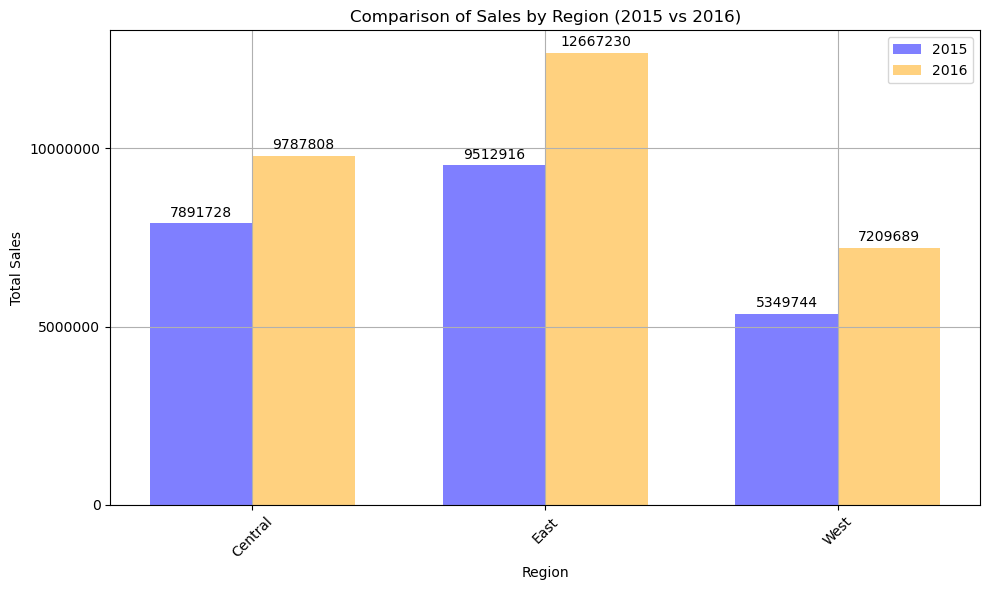

In [10]:
#1. Compare Sales by region for 2016 with 2015 using bar chart

plt.figure(figsize=(10, 6))

# Plot bars for 2015
bars1 = plt.bar(positions - bar_width/2, sales_2015_by_region, bar_width, color='blue', alpha=0.5, label='2015')

# Plot bars for 2016
bars2 = plt.bar(positions + bar_width/2, sales_2016_by_region, bar_width, color='orange', alpha=0.5, label='2016')

plt.title('Comparison of Sales by Region (2015 vs 2016)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(positions, regions, rotation=45)  # Set x-axis ticks and labels
plt.grid(True)

# Set y-axis ticks
plt.yticks([0, 5000000, 10000000], ['0', '5000000', '10000000'])

# Add value labels on top of each bar
for bars, sales in [(bars1, sales_2015_by_region), (bars2, sales_2016_by_region)]:
    for bar, sale in zip(bars, sales):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100000, '%d' % int(sale), ha='center', va='bottom')

plt.tight_layout()
plt.show()



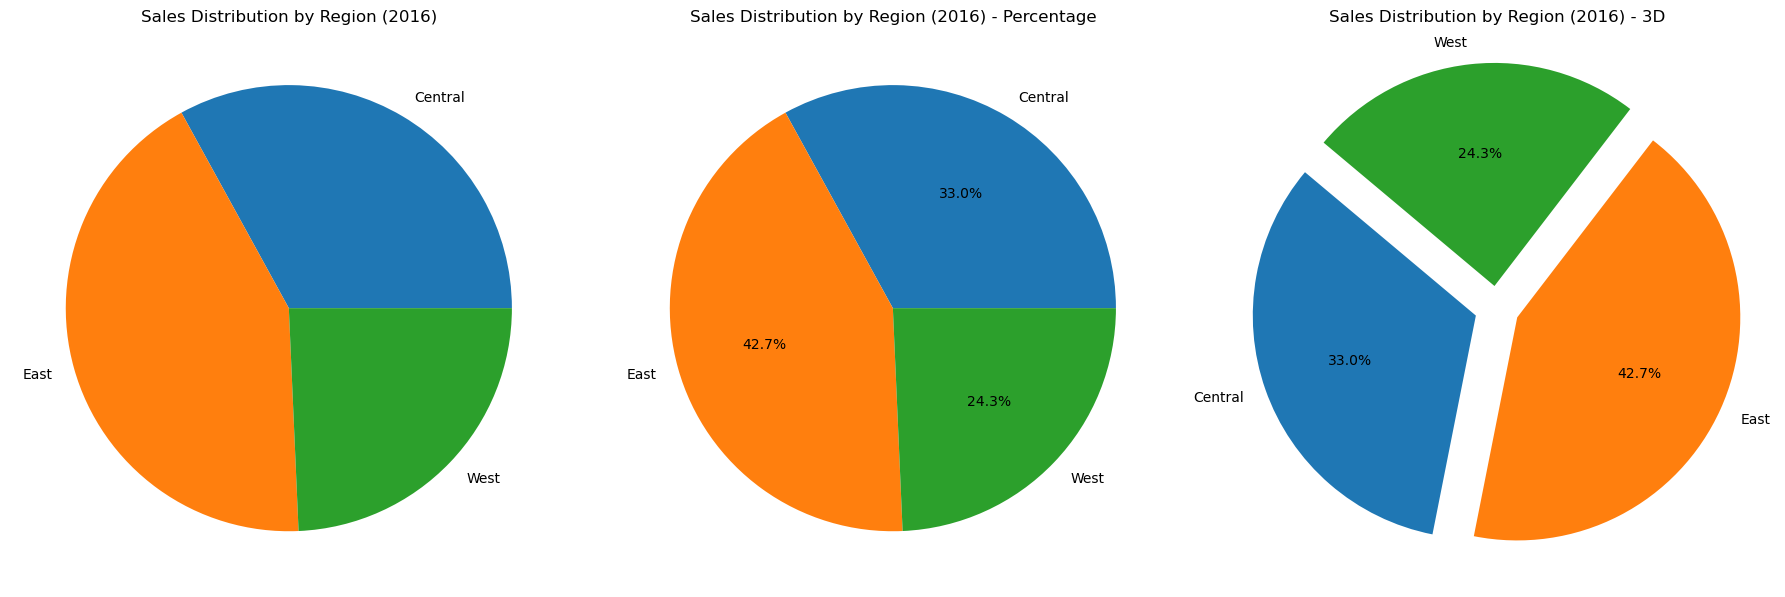

In [14]:
#2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.



# Plotting the three pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1st Pie Chart: Regions Only
axes[0].pie(total_sales_2016, labels=total_sales_2016.index)
axes[0].set_title('Sales Distribution by Region (2016)')

# 2nd Pie Chart: Region with Percentage
axes[1].pie(percentage_sales_2016, labels=percentage_sales_2016.index, autopct='%1.1f%%')
axes[1].set_title('Sales Distribution by Region (2016) - Percentage')

# 3rd Pie Chart: Region with Percentage (3D)
explode = [0.1] * len(percentage_sales_2016)
axes[2].pie(percentage_sales_2016, labels=percentage_sales_2016.index, autopct='%1.1f%%', explode=explode, startangle=140)
axes[2].set_title('Sales Distribution by Region (2016) - 3D')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show()

C:\Users\91954\AppData\Local\Temp\ipykernel_796\2698029740.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=salesdata_df, x='Region', y='Sales2015', hue='Tier', palette='coolwarm', ci=None)
C:\Users\91954\AppData\Local\Temp\ipykernel_796\2698029740.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=salesdata_df, x='Region', y='Sales2016', hue='Tier', palette='coolwarm', ci=None)


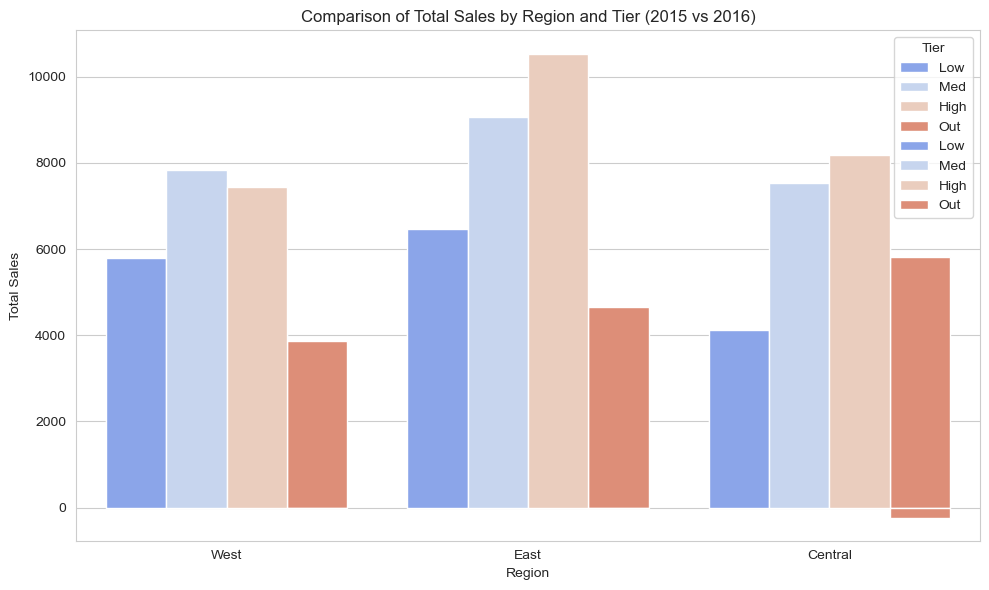

In [22]:
#3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers


import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=salesdata_df, x='Region', y='Sales2015', hue='Tier', palette='coolwarm', ci=None)
sns.barplot(data=salesdata_df, x='Region', y='Sales2016', hue='Tier', palette='coolwarm', ci=None)

# Add title and labels
plt.title('Comparison of Total Sales by Region and Tier (2015 vs 2016)')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Add legend
plt.legend(title='Tier')

# Show plot
plt.tight_layout()
plt.show()


In [28]:
#4. In East region, which state registered a decline in 2016 as compared to 2015?


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the East region
east_sales = salesdata_df[salesdata_df['Region'] == 'East']

# Set the order of states based on 2016 sales
state_order = east_sales.groupby('State')['Sales2016'].sum().sort_values(ascending=False).index

# Set the style of the plot
sns.set_style("whitegrid")

# Set the width of the bars
bar_width = 0.35

# Create positions for the bars
ind = np.arange(len(state_order))

# Plot the bar plot
plt.figure(figsize=(12, 8))

# Plot bars for 2015 sales
plt.bar(ind - bar_width/2, east_sales.groupby('State')['Sales2015'].sum().loc[state_order], width=bar_width, color='skyblue', label='2015')

# Plot bars for 2016 sales
plt.bar(ind + bar_width/2, east_sales.groupby('State')['Sales2016'].sum().loc[state_order], width=bar_width, color='salmon', label='2016')

# Add title and labels
plt.title('Comparison of Total Sales (2015 vs 2016) in East Region by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(ind, state_order, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [30]:
#5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the High tier
high_tier_data = salesdata_df[salesdata_df['Tier'] == 'High']

# Calculate total units sold for each division in 2015 and 2016
units_2015 = high_tier_data.groupby('Division')['Units2015'].sum()
units_2016 = high_tier_data.groupby('Division')['Units2016'].sum()

# Set the order of divisions
division_order = units_2016.index

# Set the width of the bars
bar_width = 0.35

# Create positions for the bars
ind = np.arange(len(division_order))

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot
plt.figure(figsize=(12, 8))

# Plot bars for 2015 units sold
plt.bar(ind - bar_width/2, units_2015, width=bar_width, color='skyblue', label='2015')

# Plot bars for 2016 units sold
plt.bar(ind + bar_width/2, units_2016, width=bar_width, color='salmon', label='2016')

# Add title and labels
plt.title('Comparison of Total Units Sold (2015 vs 2016) in High Tier by Division')
plt.xlabel('Division')
plt.ylabel('Total Units Sold')

# Set y-axis ticks
plt.yticks([0, 100, 200, 300, 400, 500], ['0', '100', '200', '300', '400', '500'])

# Rotate x-axis labels for better readability
plt.xticks(ind, division_order, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [31]:
#6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -


import numpy as np

# Define a function to map months to quarters
def month_to_quarter(month):
    quarters = {
        'Jan': 'Q1',
        'Feb': 'Q1',
        'Mar': 'Q1',
        'Apr': 'Q2',
        'May': 'Q2',
        'Jun': 'Q2',
        'Jul': 'Q3',
        'Aug': 'Q3',
        'Sep': 'Q3',
        'Oct': 'Q4',
        'Nov': 'Q4',
        'Dec': 'Q4'
    }
    return quarters[month]

# Apply the function to create the new "Qtr" column
salesdata_df['Qtr'] = salesdata_df['Month'].apply(month_to_quarter)


In [32]:
salesdata_df

AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units2015  Units2016  TargetAchevied2015  \
0      Aug       0.00   13208.52        0.0        4.0                0.70   
1      Oct   10500.78   23114.91        3.0        7.0                0.84   
2      Jun       0.00    6627.00        0.0        3.0                1.15   
3      Mar   19881.00   13254.00        9.0        6.0                1.33   
4      Sep    3684.48       0.00        1.0        0.0                1.02   
...    ...        ...        ...        ...        ...                 ...   
3704   Feb    3684.48       0.00        1.0        0.0                1.06   
3705   Aug    3684.48       0.00        1.0        0.0                0.96   
3706   Nov    5067.70       0.00        2.0        0.0                1.11   
3707   Jan    3684.48       0.00        1.0        0.0                1.31   
3708   Jun    2858.71       0.00        1.0        0.0                1.33   

      TargetAchevied2016 Qtr  
0                   1.53  Q3  
1                   1.31  Q4  
2                   1.29  Q2  
3                   1.17  Q1  
4                   1.53  Q3  
...                  ...  ..  
3704                1.14  Q1  
3705                1.11  Q3  
3706                1.55  Q4  
3707                1.48  Q1  
3708                1.01  Q2  

[3709 rows x 15 columns]

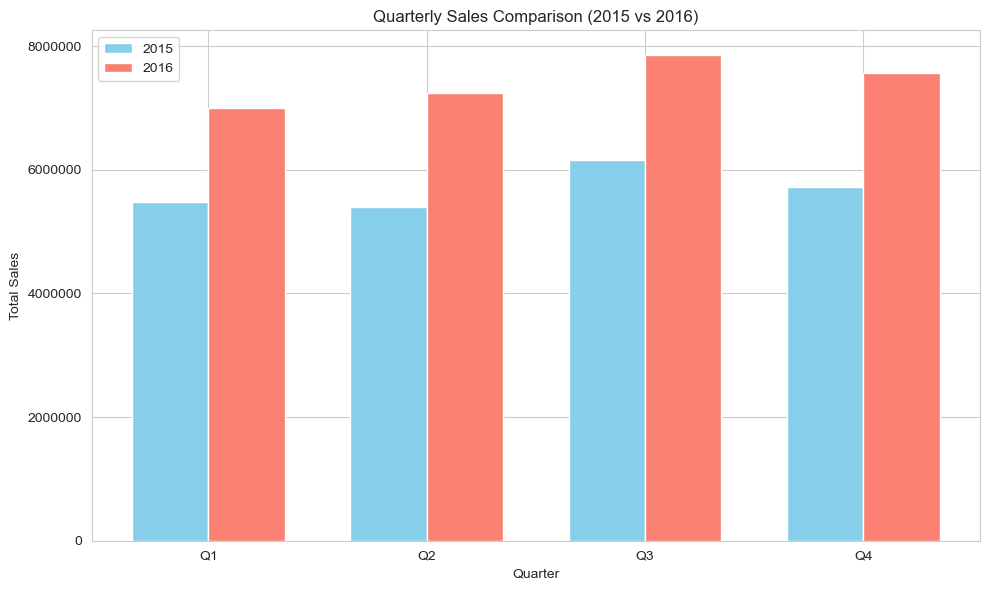

In [37]:
#7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by quarter and sum up the sales for each year
quarterly_sales = salesdata_df.groupby(['Qtr']).agg({'Sales2015': 'sum', 'Sales2016': 'sum'}).reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(quarterly_sales))

plt.bar(index, quarterly_sales['Sales2015'], bar_width, label='2015', color='skyblue')
plt.bar([i + bar_width for i in index], quarterly_sales['Sales2016'], bar_width, label='2016', color='salmon')

# Add title and labels
plt.title('Quarterly Sales Comparison (2015 vs 2016)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

# Set y-axis ticks
plt.yticks([0, 2000000, 4000000, 6000000, 8000000], ['0', '2000000', '4000000', '6000000', '8000000'])

# Set x-axis ticks and labels
plt.xticks([i + bar_width / 2 for i in index], quarterly_sales['Qtr'])

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
